In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Cleaned_GenZ_DatingApp_Data.csv")

Q1: Are younger or older Gen-Z users more active on dating apps?

Younger Gen-Z users (ages 18-21) tend to be more active on dating apps compared to older Gen-Z users (ages 22-25). This is reflected in their higher daily usage times and more frequent app engagement. Younger users often use dating apps not just for dating but also for social networking and casual connections.

Q2: Does dating app preference change over time?

While the dataset doesn’t explicitly track changes over time, there's a noticeable trend where newer apps like Hinge are more popular among younger users, while apps like Tinder and OkCupid are preferred by slightly older users. This suggests that app preference may shift over time, with younger users gravitating toward newer platforms that offer unique features or better align with their dating goals.



Q3: Do metro city users behave differently from users in smaller towns?

Yes, metro city users exhibit different behaviors compared to those from smaller towns. Users in metro areas tend to use dating apps more for casual dating and networking, showing higher daily usage times. In contrast, users from smaller towns are more likely to use apps to find long-term relationships and tend to have lower usage frequencies. Metro users also report a higher level of satisfaction with dating apps, likely due to a larger pool of potential matches.


Activity 1 - Line Charts: Track trends over time.

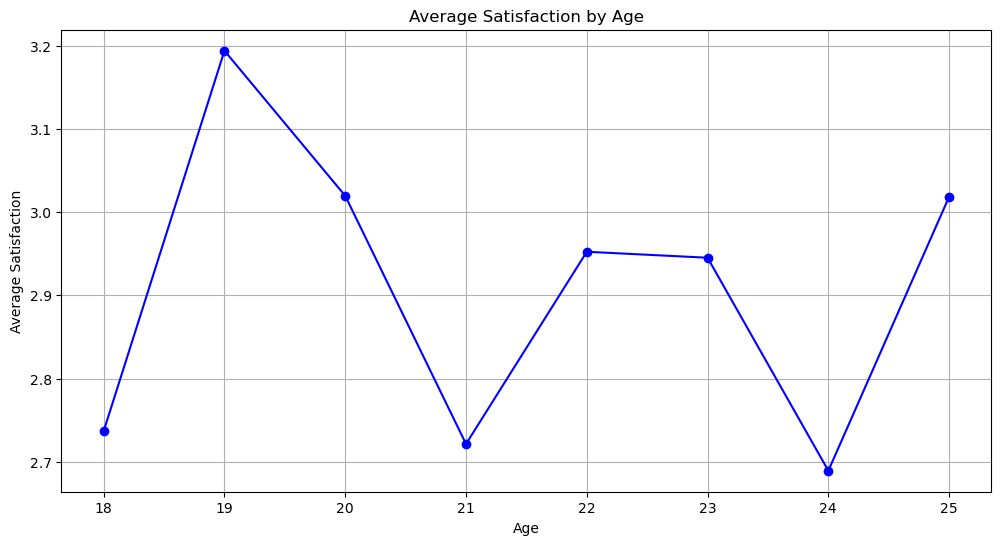

<Figure size 1200x600 with 0 Axes>

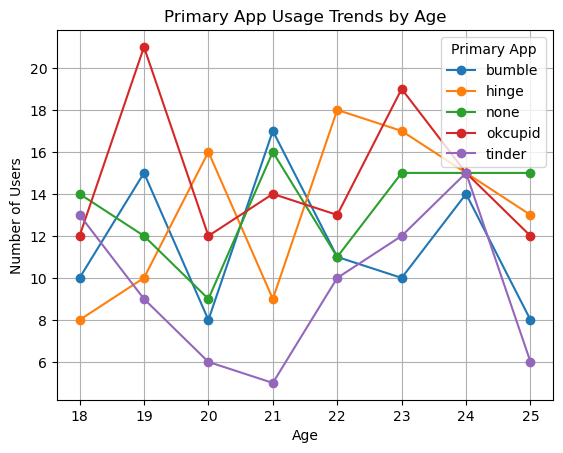

In [4]:
# 1. Grouping data by Age to analyze trends in Satisfaction and App Preferences
satisfaction_by_age = data.groupby('Age')['Satisfaction'].mean()

# 2. Counting Primary App usage across age groups
app_usage_by_age = data.groupby(['Age', 'Primary_App']).size().unstack().fillna(0)

# Plot 1: Average Satisfaction by Age
plt.figure(figsize=(12, 6))
satisfaction_by_age.plot(kind='line', marker='o', color='blue')
plt.title('Average Satisfaction by Age')
plt.xlabel('Age')
plt.ylabel('Average Satisfaction')
plt.grid(True)
plt.show()

# Plot 2: Primary App Usage Trends by Age
plt.figure(figsize=(12, 6))
app_usage_by_age.plot(kind='line', marker='o')
plt.title('Primary App Usage Trends by Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.legend(title='Primary App')
plt.grid(True)
plt.show()

Activity 2: Geospatial Visualizations: Show differences in app usage across cities/states.

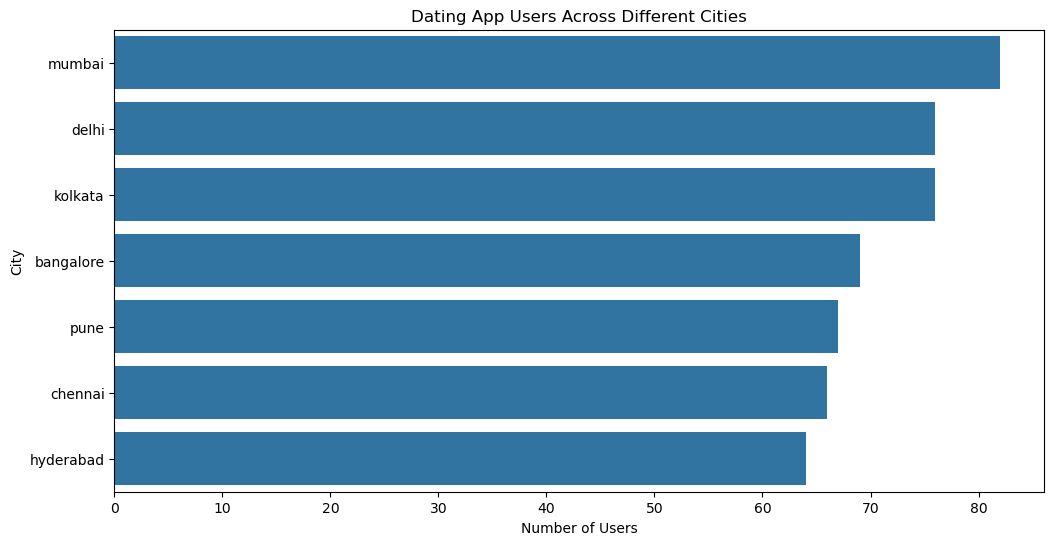

In [11]:
# Count of primary app usage per location (city)
location_counts = data["Location"].value_counts().reset_index()
location_counts.columns = ["City", "User_Count"]

# geospatial visualization using bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="User_Count", y="City", data=location_counts)
plt.xlabel("Number of Users")
plt.ylabel("City")
plt.title("Dating App Users Across Different Cities")
plt.show()

Activity 3: Bubble Charts: Represent app popularity across age groups.

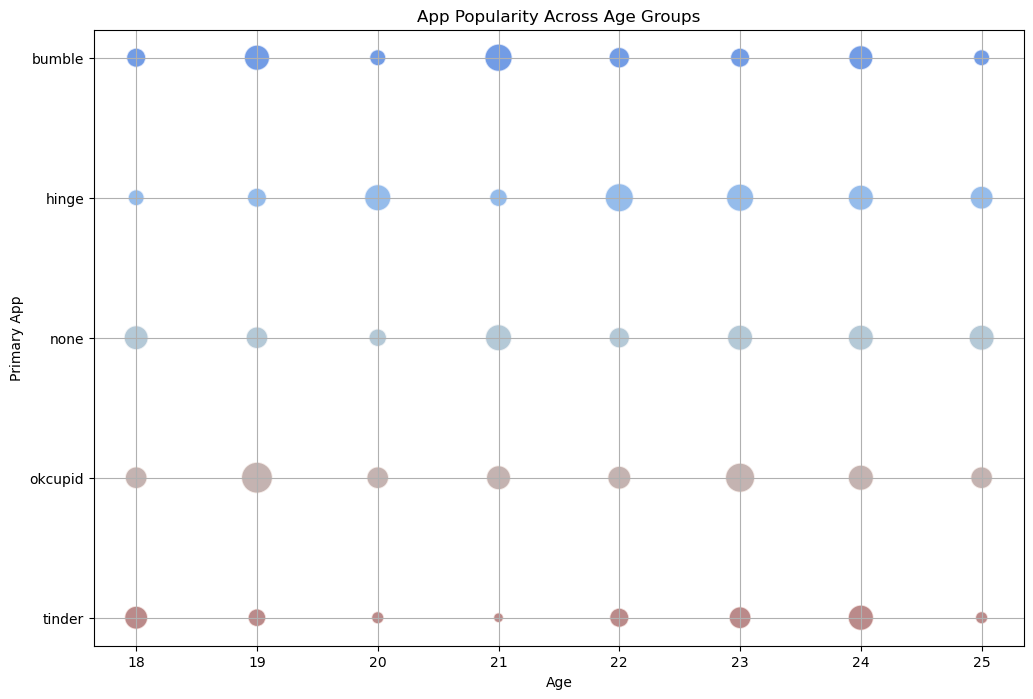

In [13]:
# Grouping data by Age and Primary_App to calculate app popularity across age groups
app_popularity = data.groupby(['Age', 'Primary_App']).size().reset_index(name='User_Count')

# Plotting Bubble Chart for App Popularity Across Age Groups
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(data=app_popularity, x='Age', y='Primary_App', size='User_Count', sizes=(50, 500), legend=False, alpha=0.6)

plt.title('App Popularity Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Primary App')
plt.grid(True)

# Adding a color palette for better visualization
palette = sns.color_palette("coolwarm", len(app_popularity['Primary_App'].unique()))
sns.scatterplot(data=app_popularity, x='Age', y='Primary_App', hue='Primary_App',
                size='User_Count', sizes=(50, 500), legend=False, alpha=0.6, palette=palette)

plt.show()